In [1]:
library(glmnet)
library(ggplot2)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



In [2]:
options(stringsAsFactors = FALSE)

In [3]:
base_dir <- "/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/feature_selection/"

In [4]:
load(paste0(base_dir, "late.RData"))

In [5]:
length(bootstraps)

[1] 1000

In [6]:
lambda_sequence <- bootstraps[[1]][["lambda"]]
genes <- rownames(coef(bootstraps[[1]], s = lambda_sequence[1]))

In [7]:
head(genes)

[1] "(Intercept)"  "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"  
[6] "MALAT1_HUMAN"

In [8]:
head(lambda_sequence)

[1] 0.5630120 0.5350366 0.5084513 0.4831870 0.4591781 0.4363621

In [9]:
genes <- genes[2:length(genes)]

In [10]:
head(genes)
length(genes)
num_genes <- length(genes)

[1] "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"   "MALAT1_HUMAN"
[6] "PIGP_HUMAN"

[1] 22187

In [11]:
nonzero_gene_count <- c()
lambda <- min(lambda_sequence)

genes_coeff <- coef(bootstraps[[1]], s = lambda)
genes_coeff <- genes_coeff[2:length(genes_coeff),]
gene_names <- names(genes_coeff)
genes_nonzero <- gene_names[abs(genes_coeff) > 0]
nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))

genes_intersect <- genes_nonzero

for (i in 2:length(bootstraps)) {
    lambda_seq <- bootstraps[[i]][["lambda"]]
    if (lambda < tail(lambda_seq, n = 1)) {
        print(i)
    } 
    genes_coeff <- coef(bootstraps[[i]], s = lambda)
    genes_coeff <- genes_coeff[2:length(genes_coeff),]
    gene_names <- names(genes_coeff)
    genes_nonzero <- gene_names[abs(genes_coeff) > 0]
    nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))
    genes_intersect <- intersect(genes_intersect, genes_nonzero)
}

### Non-zero genes in all rounds

In [12]:
print(length(genes_intersect))
genes_intersect

[1] 27


[1] "COL2A1_HUMAN"    "KCNIP4_HUMAN"    "SORCS1_HUMAN"    "ROBO2_HUMAN"    
 [5] "PTCHD4_HUMAN"    "GPC6_HUMAN"      "KIF26B_HUMAN"    "CNTN5_HUMAN"    
 [9] "COL4A2_HUMAN"    "SYT1_HUMAN"      "TENM3_HUMAN"     "TENM4_HUMAN"    
[13] "RBMS3_HUMAN"     "SPHKAP_HUMAN"    "NEAT1_HUMAN"     "DLEU1_HUMAN"    
[17] "NRP2_HUMAN"      "CASC9_HUMAN"     "NR2F2-AS1_HUMAN" "LAMA1_HUMAN"    
[21] "SGIP1_HUMAN"     "QRFPR_HUMAN"     "DACT1_HUMAN"     "HSPB7_HUMAN"    
[25] "SOX6_HUMAN"      "PPP1R3A_HUMAN"   "PRRX1_HUMAN"

### Distribution of non-zero genes at min lambda

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


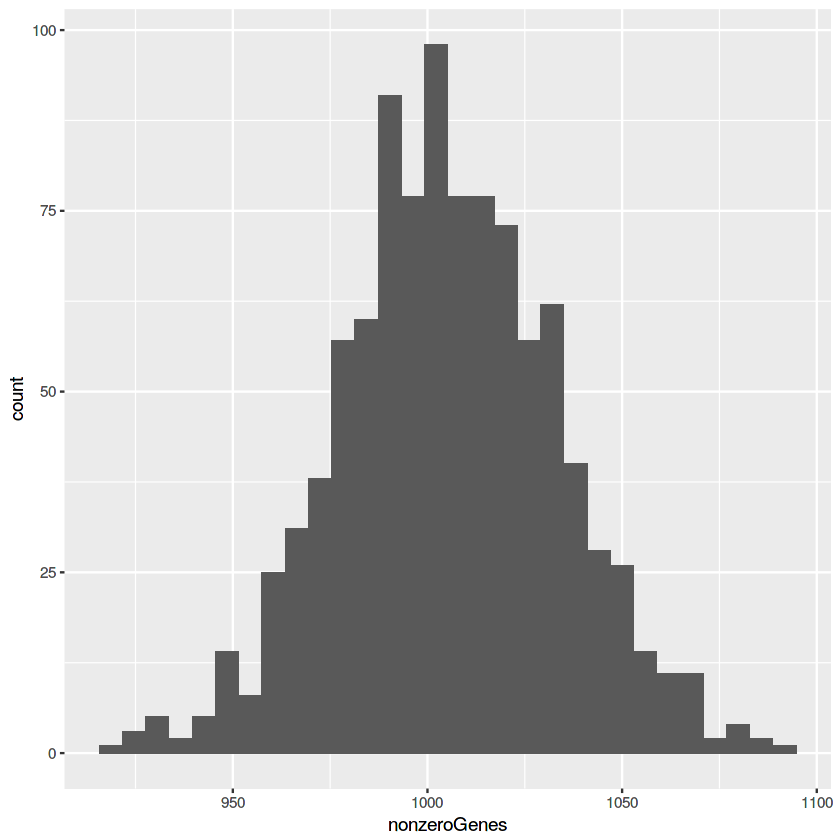

In [13]:
nonzero_gene_count <- as.data.frame(nonzero_gene_count)
colnames(nonzero_gene_count) <- "nonzeroGenes"
ggplot(nonzero_gene_count) + geom_histogram(aes(nonzeroGenes))

### Compare gene list to previous analysis (remove_1s2exp data)

In [14]:
remove_1st2exp_genes <- c('ACTA1_HUMAN','FBN2_HUMAN','MYH6_HUMAN','COL2A1_HUMAN','ADAMTS12_HUMAN','CCDC141_HUMAN','FAM189A2_HUMAN','GRIN2A_HUMAN','GOLIM4_HUMAN','PRTG_HUMAN','PLN_HUMAN','VCAN_HUMAN','MYO1D_HUMAN','CNTN5_HUMAN','BMPER_HUMAN','KCNH7_HUMAN','FAM19A4_HUMAN','ATP1A1_HUMAN','WWOX_HUMAN','SAMD4A_HUMAN','SPHKAP_HUMAN','MYH7_HUMAN','SEMA5A_HUMAN','FBXL7_HUMAN','PAM_HUMAN','PDGFD_HUMAN','RNF150_HUMAN','ADAM28_HUMAN','MEF2C_HUMAN','H19_HUMAN','RBFOX2_HUMAN','LINC00881_HUMAN','MLIP_HUMAN','GAS6_HUMAN','ADAM23_HUMAN','EPB41L4A_HUMAN','MOXD1_HUMAN','SV2C_HUMAN','PRSS35_HUMAN','QRFPR_HUMAN','DOK4_HUMAN','LIN28A_HUMAN')
x <- intersect(remove_1st2exp_genes, genes_intersect)
x
length(x)

[1] "COL2A1_HUMAN" "CNTN5_HUMAN"  "SPHKAP_HUMAN" "QRFPR_HUMAN"

[1] 4

Only 4 genes are detected in both analyses

### Caclulate fold changes for genes

In [15]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [16]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_normalized_counts.RData")

In [17]:
cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_metadata.csv")

In [18]:
head(cell_metadata)

X,nGene,nUMI,orig.ident,day,protocol,cell_line,diff_harvest,passage,scientist,diff_exp,sci_exp,ctnt,cell_sample
AAACATCGAAACATCG_14_6,1577,2986,SeuratProject,D12,Lian,AICS11,08_8_2017,44,KG,7_24_2017,KG_7_24,90,15
AAACATCGAAACATCG_21_10,578,727,SeuratProject,D14,Murry,AICS0,08_11_2017,28,KG,7_27_2017,KG_7_27,78,22
AAACATCGAACAACCA_2_9,489,606,SeuratProject,D12,Lian,AICS37,07_24_2017,34,AN,7_10_2017,AN_7_10,89,3
AAACATCGAACAACCA_5_8,1117,1511,SeuratProject,D14,Murry,AICS0,07_28_2017,32,AN,7_13_2017,AN_7_13,75,6
AAACATCGAACGCTTA_32_8,940,1599,SeuratProject,D24,Lian,AICS11,08_18_2017,44,KG,7_24_2017,KG_7_24,92,33
AAACATCGAACTCACC_26_2,2282,4392,SeuratProject,D12,Lian,AICS37,08_11_2017,37,KG,7_27_2017,KG_7_27,87,27


In [19]:
cardioAICS <- t(cardioAICS)

late_cells <- cell_metadata$day %in% c("D24", "D26")
cardioAICS <- cardioAICS[late_cells,]

diff_day <- cell_metadata$day[late_cells]

names(diff_day) <- cell_metadata$X[late_cells]

cell_metadata <- cell_metadata[late_cells,]

In [20]:
head(cell_metadata)

,X,nGene,nUMI,orig.ident,day,protocol,cell_line,diff_harvest,passage,scientist,diff_exp,sci_exp,ctnt,cell_sample
5,AAACATCGAACGCTTA_32_8,940,1599,SeuratProject,D24,Lian,AICS11,08_18_2017,44,KG,7_24_2017,KG_7_24,92,33
11,AAACATCGAAGAGATC_46_1,1697,2722,SeuratProject,D24,Lian,AICS37,08_22_2017,36,AN,7_27_2017,AN_7_27,65,47
12,AAACATCGAAGGACAC_35_12,1659,2651,SeuratProject,D26,Murry,AICS11,08_18_2017,44,AN,7_24_2017,AN_7_24,92,36
18,AAACATCGACAAGCTA_44_7,412,499,SeuratProject,D24,Lian,AICS37,08_22_2017,37,KG,7_27_2017,KG_7_27,84,45
22,AAACATCGACACGACC_28_5,2200,4082,SeuratProject,D24,Lian,AICS0,08_16_2017,33,AN,7_20_2017,AN_7_20,68,29
25,AAACATCGACAGCAGA_28_12,1544,2503,SeuratProject,D24,Lian,AICS0,08_16_2017,33,AN,7_20_2017,AN_7_20,68,29


In [21]:
genes.use <- genes_intersect

cytokine_cells <- cell_metadata$X[cell_metadata$protocol == "Murry"]
small_mol_cells <- cell_metadata$X[cell_metadata$protocol == "Lian"]

cytokine_exp_mat <- cardioAICS[cytokine_cells,]
small_mol_exp_mat <- cardioAICS[small_mol_cells,]

foldChange_list <- list()
for (i in 1:length(genes.use)) {
    gene <- genes.use[i]
    cytokine_exp <- cytokine_exp_mat[,gene]
    small_mol_exp <- small_mol_exp_mat[,gene]
    log2fc <- log2(mean(expm1(small_mol_exp)) + 1) - log2(mean(expm1(cytokine_exp)) + 1)
    foldChange_list[[gene]] <- log2fc
    
}

lfc_df <- data.frame("log2fc" = as.numeric(foldChange_list), "gene" = names(foldChange_list), row.names = names(foldChange_list))
lfc_df <- dplyr::arrange(lfc_df, log2fc)

In [22]:
lfc_df

log2fc,gene
-2.31623337,CNTN5_HUMAN
-0.99836845,ROBO2_HUMAN
-0.76626134,SOX6_HUMAN
-0.75889264,KIF26B_HUMAN
-0.60881212,DACT1_HUMAN
-0.59181289,SPHKAP_HUMAN
-0.58328797,SORCS1_HUMAN
-0.55093675,PPP1R3A_HUMAN
-0.21021912,RBMS3_HUMAN
-0.09507894,PRRX1_HUMAN


### Fit using 27 genes

In [23]:
diff_day <- as.factor(diff_day)

In [25]:
library(boot)

In [26]:
subset_cardio <- cardioAICS[,genes.use]
subset_cardio <- as.data.frame(as.matrix(subset_cardio))

In [28]:
dim(subset_cardio)

[1] 4773   27

In [29]:
fit <- glm(diff_day ~ .,
    data = subset_cardio, family = binomial("logit")
   )

In [30]:
fit


Call:  glm(formula = diff_day ~ ., family = binomial("logit"), data = subset_cardio)

Coefficients:
      (Intercept)       COL2A1_HUMAN       KCNIP4_HUMAN       SORCS1_HUMAN  
           0.2847            -0.3881            -0.3323             0.3108  
      ROBO2_HUMAN       PTCHD4_HUMAN         GPC6_HUMAN       KIF26B_HUMAN  
           0.3683            -0.4988            -0.3070             0.5061  
      CNTN5_HUMAN       COL4A2_HUMAN         SYT1_HUMAN        TENM3_HUMAN  
           0.5638            -0.3143            -0.5946            -0.4330  
      TENM4_HUMAN        RBMS3_HUMAN       SPHKAP_HUMAN        NEAT1_HUMAN  
          -0.3244             0.3641             0.2732            -0.2388  
      DLEU1_HUMAN         NRP2_HUMAN        CASC9_HUMAN  `NR2F2-AS1_HUMAN`  
          -0.4787            -0.3250            -0.6158            -1.3699  
      LAMA1_HUMAN        SGIP1_HUMAN        QRFPR_HUMAN        DACT1_HUMAN  
          -0.3205            -0.6215            -0.7

In [31]:
subset_cardio$diff_day <- diff_day

In [32]:
cost <- function(r, pi = 0) mean(abs(r-pi) > 0.5)
cv.test <- cv.glm(subset_cardio, cost = cost, fit, K = 5)

In [33]:
cv.test$delta

[1] 0.1016132 0.1019065

In [35]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_normalized_counts.RData")
holdout_cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_metadata.csv")

In [36]:
holdout_cardioAICS <- t(holdout_cardioAICS)
holdout_late_cells <- holdout_cell_metadata$day %in% c("D24", "D26")
holdout_cardioAICS <- holdout_cardioAICS[holdout_late_cells,]

diff_day <- holdout_cell_metadata$day[holdout_late_cells]

names(diff_day) <- holdout_cell_metadata$X[holdout_late_cells]

holdout_cell_metadata <- holdout_cell_metadata[holdout_late_cells,]

In [38]:
holdout_mat <- holdout_cardioAICS[,genes.use]
holdout_mat <- as.data.frame(as.matrix(holdout_mat))

In [40]:
dim(holdout_mat)

[1] 539  27

In [41]:
holdout_predict <- predict(fit, newdata = holdout_mat, type = c("response"))

In [52]:
get_predicted_time <- function(predict_prob) {
    if (predict_prob < 0.5) {
        return("D24")
    } else {
        return("D26")
    }
}

In [53]:
predicted_day <- sapply(holdout_predict, get_predicted_time, simplify = TRUE)

In [55]:
predict_actual_df <- data.frame("predicted" = predicted_day, "actual" = diff_day)
xtabs(~ predicted + actual, data = predict_actual_df)

         actual
predicted D24 D26
      D24 219  31
      D26  32 257